**GROUP B PROJECT**

**PREDICTING APP SUCESS USING GOOGLE PLAYSTORE DATA SET**

**Group Members**

Cleve Mwebi

Vivian Mosomi

Mark Njagi

Peter Kinyanjui

Arnorld Mochama

Cynthia Chiuri

**BUSINESSS UNDERSTANDING**

Business Context:

The Google Play Store hosts a vast number of mobile applications across various categories. Understanding the factors that influence app ratings and user preferences is crucial for app developers, marketers, and stakeholders.

Stakeholders:

1)App Developers:They want to create successful apps that receive high ratings and downloads.

2)Marketers: They need insights to promote apps effectively.

3)Google Play Store: The platform aims to provide a positive user experience and attract more users.

Key Objectives

1. Predicting App Ratings: Develop a machine learning model to classify the ratings Installs of apps on the Google Play Store based on various features such as number of reviews, size, category, etc.

3. Identifying Factors Influencing App Popularity: Analyze the dataset to identify the key factors that contribute to the popularity of apps on the Google Play Store. This could involve determining which features have the strongest correlation with the number of installs or ratings.

4. Identifying Market Trends: Analyze the dataset to identify trends in the Google Play Store market, such as changes in user preferences over time, emerging app categories, or shifts in the distribution of app ratings. This could help app developers stay ahead of the curve and adapt their strategies accordingly.

**DATA UNDERSTANDING**

The link to the Kaggle data set:

https://www.kaggle.com/datasets/lava18/google-play-store-apps

The Google Play Store dataset contains information about numerous apps available on the platform, including:

App name - The name of the mobile application

Category - The category the app belongs to E.g- Family, Education

Ratings - The user rating of the app.

Reviews - The number of reviews the app has received

Size - The size of the app in terms of storage space

Installs - Contains the installations count(The number of times the app has been installed)

Type - Whether the app is free or paid

Price - The Price of the app if it's not free

Content rating - The target audience or the age group for which the app is suitable

Genres - The specific category of the app, which is similar to the category columm

Last app update - The date when the app was last updated

Current app version - Current version number of the app

Android version - The minimum required android version to run the app

By analyzing this dataset, we can gain insights into the factors influencing app popularity, user engagement, and market trends within the Google Play Store ecosystem.

**Importing libraries needed**

In [234]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
%matplotlib inline

import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm

### 1. Data Understanding

Loading the Data

In [235]:
#Loading the dataset
data = pd.read_csv("googleplaystore.csv")
data2 = data.copy()
data2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [236]:
# Shape of the data

data2.shape

(10841, 13)

In [237]:
# Info of the data

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [238]:
# Statistics of the data

data2.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [239]:
# First five rows of the data

data2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 2. Data Cleaning

In [240]:
# Identifying the outlier row

data2[data2['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


The observation for the above row is that it has mismatched values which have to be shifted to the right

In [241]:
# Dropping the above row

data2 = data2[data2['Category'] != '1.9']

From data understanding, 2 columns which are category and genres have the same information. For the next step, we're deciding which column of the two, to use.

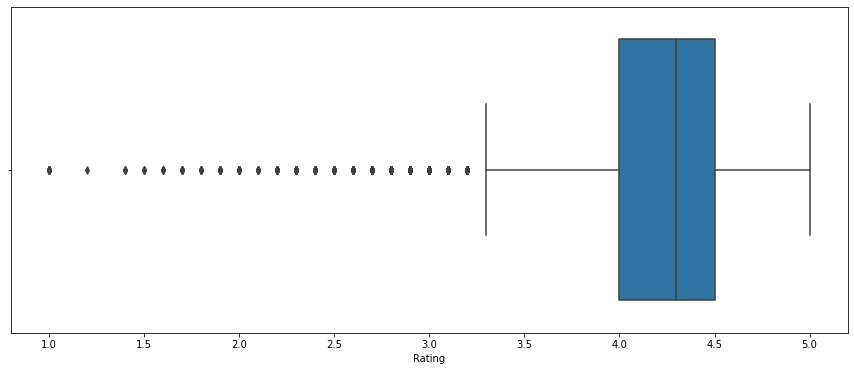

In [242]:
# Dealing with missing values in the ratings column

# Drawing a boxplot to visualise ratings column

plt.figure(figsize=(15,6))
sns.boxplot(x=data2['Rating']);

In [243]:
# Checking for null values

data2.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

For the rating column, we've decided to impute the missing values with median because it has outliers that is proved by the box plot above.

In [244]:
# Imputing the rating column with median

median_rating = data['Rating'].median()
data2['Rating'].fillna(median_rating,inplace=True)

The row with the missing value in the type column is this one below:

In [245]:
data2[data2['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


From this, the Price column is 0 meaning the Type is Free and should not be missing

In [246]:
# Replacing NaN with Free in the type column

data2['Type'].fillna(value='Free',inplace=True)

In [247]:
data2.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [248]:
# Checking for duplicates

data2.loc[data2.duplicated(keep=False)].sort_values(by='App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device


In [249]:
# Dropping duplicates 

data2.drop_duplicates(inplace=True)

In [250]:
data2.duplicated().sum()

0

From the above analysis, 843 duplicate values were found and dropped. The resulting dataset contains 10357 rows and 13 columns.

In [251]:
data2.shape

(10357, 13)

In [252]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Checking for consistency of data types across columns
### We begin with the Reviews column whose values should be numeric but are currently stored as objects

In [253]:
data2['Reviews'] = data2['Reviews'].astype('int64')

In the above code, we've converted the reviews column to an integer data type

### The size column

'''
Dealing with Size column has two steps:

1. Changing the 'Varies with device' values to an agreed value - we decided to impute the values with 12Mb since it is the 
   average size of most Android apps from research(citation needed)
2. Converting Mbs to kBs: 1MB = 1024 KB
3. Comverting Variance with device with 12,288kb

'''

In [254]:
def replace_MK_with_numbers(size):
    if 'M' in size:
        size = size.replace('M', '')
        return float(size) * 1024
    elif 'K' in size or 'k' in size:
        size = size.replace('K', '').replace('k', '')
        return float(size) * 1
    elif size == 'Varies with device':
        return 12288
    elif '+' in size:
        size = size.replace('+', '')
        size = size.replace(',', '') # remove comma
        return float(size)
    else:
        size = size.replace(',', '') # remove comma
        return float(size)

In [255]:
data2['Size'] = data2['Size'].apply(replace_MK_with_numbers)

In [256]:
# Renaming the Size column to Size(KB) for clarity

data2.rename(columns={'Size':'Size(KB)'},inplace=True)

In [257]:
data2['Size(KB)'].sample(20)

9741    52224.0
8446    20480.0
8777    47104.0
7844     3686.4
1176    43008.0
9565    22528.0
7520    12288.0
6028     3072.0
9816    15360.0
4040    61440.0
7556    14336.0
3480    12288.0
2522    11264.0
2864    12288.0
8320    12288.0
1910    12288.0
6144     2662.4
9939    31744.0
531      5939.2
1322    12288.0
Name: Size(KB), dtype: float64

''' 
TO DO LIST
1. Finish up data cleaning steps
> Check for duplicates
> Checking for consistency of data types across columns: Reviews - numeric; Size - numeric(dealing with varies
  with size to be discussed); Price - numeric; Installs - numeric/bins: to be discussed
> Changing values in the size column to kB
> Handling outliers
- One hot/Label encoding


2. Work on EDA
> Decide on either Seaborn, Tableau or matplotlib
> Visuals to be created: Correlation matrix, Line graphs etc. 
'''

In [258]:
# Changing the Price column to numeric

data2['Price'] = data2['Price'].str.replace('$', '').astype(float)

In [259]:
data2.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size(KB)          float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Checking for outliers in Numerical Columns(Rating, Reviews and Price)

This is to be revisited

In [260]:
# logged_reviews = np.log(data2['Reviews'])

In [261]:
# # Reviews column

# plt.figure(figsize=(15,6))
# # plt.xlim(-100000, 100000)
# sns.boxplot(x=logged_reviews)

- Correlation Matrix
- Pie Charts(Type of App, )
- Histogram(Counts of Categories against Category, Content Rating)
- Bar Chart(Average Ratings of Genres)
- Top 10 categories with the highest number of apps, ratings, reviews and installs
- Distribution of columns

02/03/24
- Dropping the last two columns
- Binning the Installs Column

We're dropping the last two columns because they have little effects on the target variable and they are unique to each app

In [262]:
data2.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size(KB)          float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [263]:
data2.head()

,App,Category,Rating,Reviews,Size(KB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Changes to installs column by removing the + and the comma

In [264]:
# Converting to float and removing comma and plus

data2['Installs'] = data2['Installs'].astype(str)  # convert to string
data2['Installs'] = data2['Installs'].str.replace('+', '')
data2['Installs'] = data2['Installs'].str.replace(',', '')  # remove commas
data2['Installs'] = pd.to_numeric(data2['Installs'], errors='coerce')

In [265]:
# Checking the maximum and minimum values to determine the bin size

print(data2['Installs'].min(), data2['Installs'].max())

0 1000000000


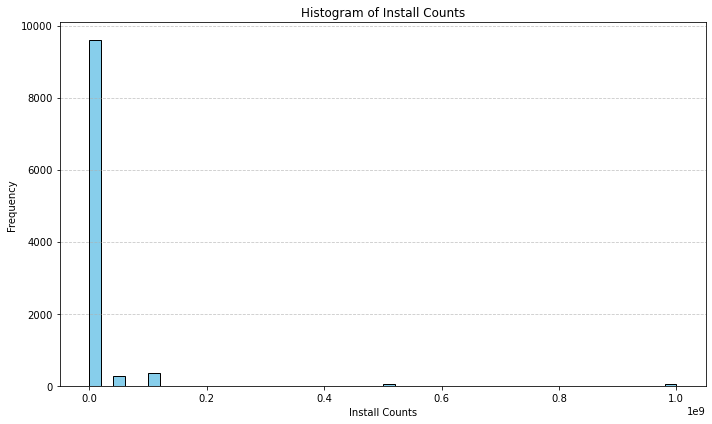

In [266]:
# Plotting a normal distribution 

plt.figure(figsize=(10, 6))
plt.hist(x=data2['Installs'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Install Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Install Counts')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [267]:
data2

,App,Category,Rating,Reviews,Size(KB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9728.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,12288.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [268]:
data2.head(5)

,App,Category,Rating,Reviews,Size(KB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## EDA

### 1. Univariate Analysis

i) Plotting Counts of Categories

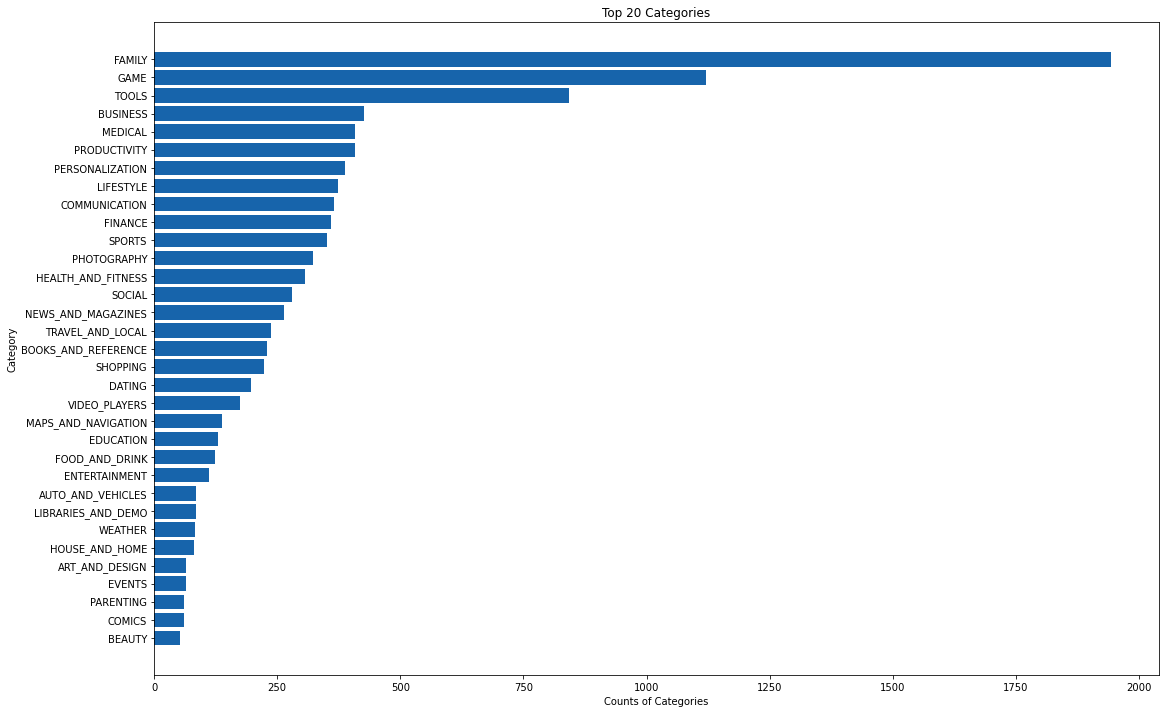

In [269]:
# Fetching top 20 categories
top_20_categories = data2['Category'].value_counts()

# Reverse the order of categories
top_20_categories = top_20_categories[::-1]

plt.figure(figsize=(18, 12))
plt.barh(top_20_categories.index, top_20_categories.values, color=plt.cm.Blues(0.8))
plt.xlabel('Counts of Categories')
plt.ylabel('Category')
plt.title('Top 20 Categories')
plt.show()


Catergory Family has most application as well as category game then tools.

ii) Visualizing the Sizes of the Apps

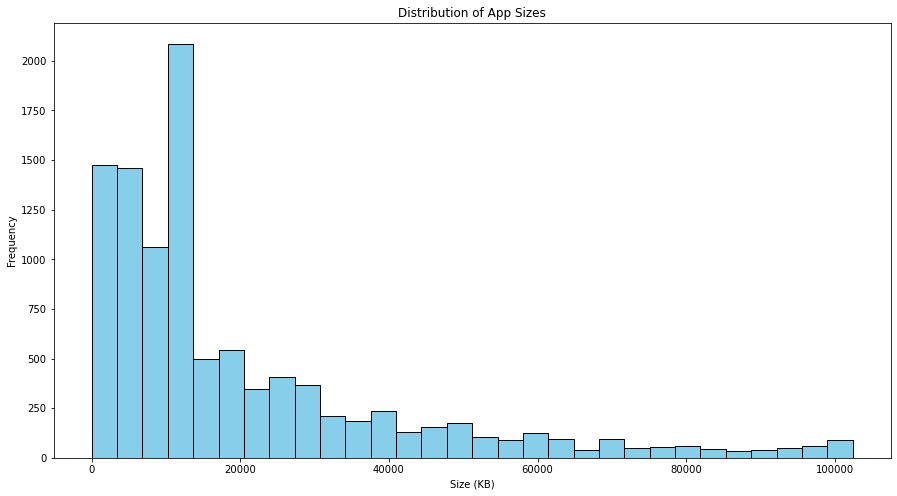

In [270]:
# Histogram showing Sizes of the Apps

plt.figure(figsize=(15, 8))
plt.hist(data2['Size(KB)'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Size (KB)')
plt.ylabel('Frequency')
plt.title('Distribution of App Sizes')
plt.show()

Most of the apps developed ranged from 0-20000 KB.

iii) Visualizing the App Types

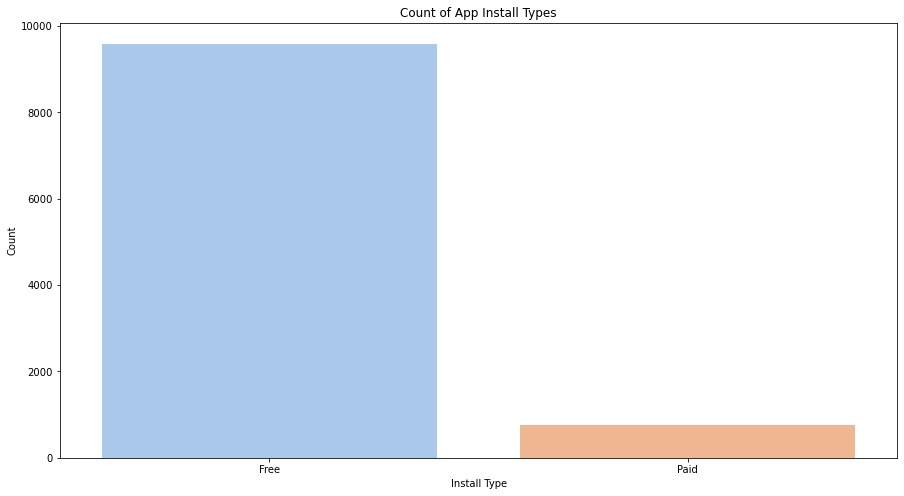

In [271]:
# Count of the types of installs

plt.figure(figsize=(15, 8))
sns.countplot(data=data2, x='Type', palette='pastel')
plt.xlabel('Install Type')
plt.ylabel('Count')
plt.title('Count of App Install Types')
plt.show()

App Types Using a Pie Chart

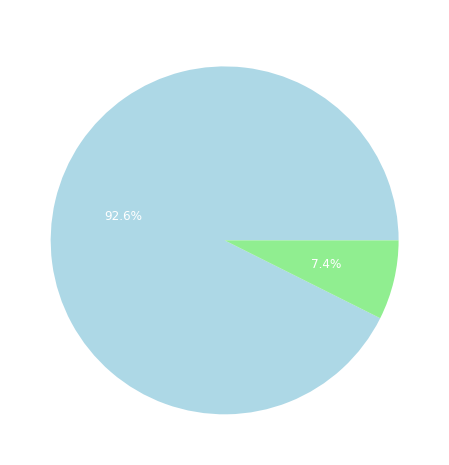

In [272]:
# Pie chart showing percentages of types

type_counts = data2['Type'].value_counts()
plt.figure(figsize=(15, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'],textprops={'fontsize': 12, 'color': 'white'})
plt.title('Percentage of App Install Types',color='white')
plt.show()

From the 2 plots above, most apps are free.
The pie chart has a 92.6% apps that are free while 7.4% that are paid

iv) Pie Chart for content rating column

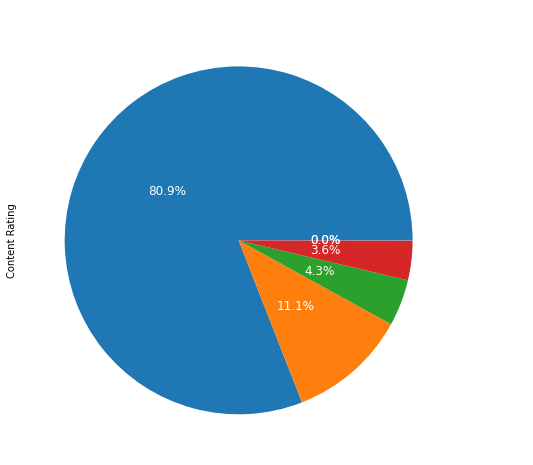

In [273]:
import matplotlib.pyplot as plt

# Plotting the pie chart with adjusted percentage label distance and position
data2['Content Rating'].value_counts().plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', pctdistance=0.5, textprops={'fontsize': 12, 'color': 'white'})

# Add a title to the pie chart
plt.title('Distribution of Content Ratings',color='white')

# Show the plot
plt.show()


Most of the apps developed were rated for everyone at 80.9% , followed by teen at 11.2% while adults only had the least.

### 2. Bivariate Analysis

i) Categories with the highest number of installs

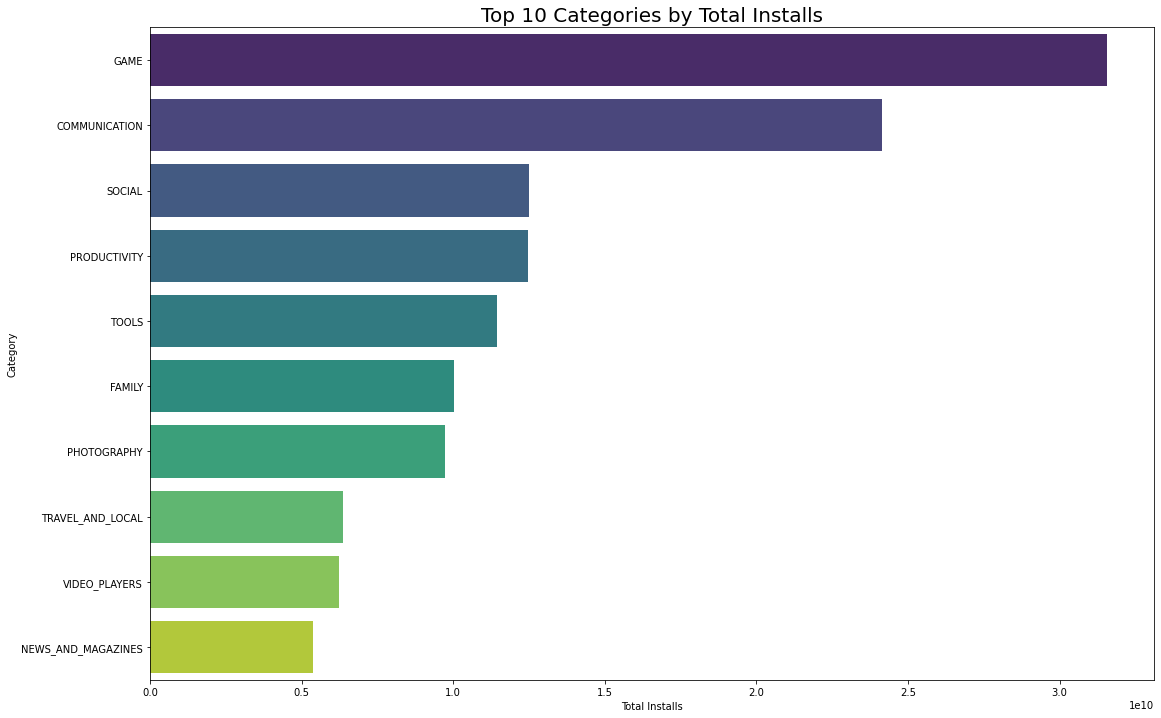

In [274]:
# Grouping Category and Installs
category_highest_installs = data2.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

# Create a horizontal bar plot
plt.figure(figsize=(18, 12))
sns.barplot(x=category_highest_installs.values, y=category_highest_installs.index, palette="viridis")
plt.title("Top 10 Categories by Total Installs", size=20)
plt.xlabel("Total Installs")
plt.ylabel("Category")
plt.show()


From the above plot, Game Category has the most number of Installs, followed by Communication and Social

ii) Distribution of Reviews by top 20 Categories

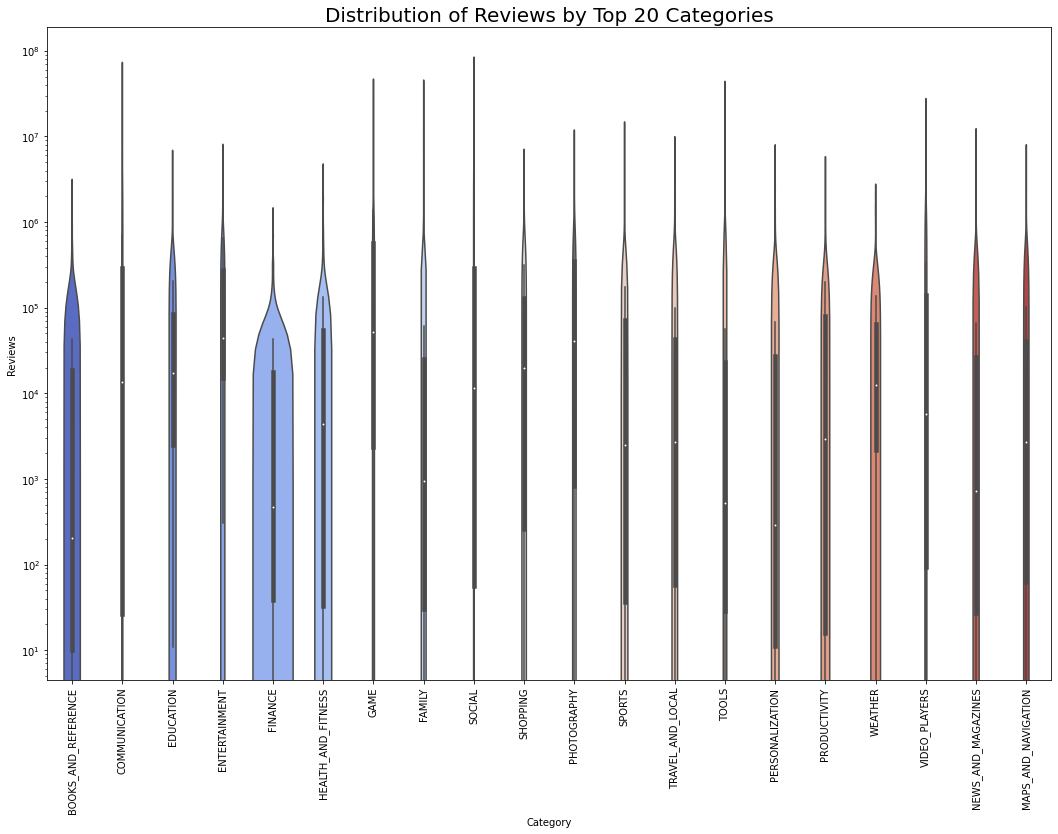

In [275]:
# Calculate the sum of reviews for each category
category_reviews = data2.groupby('Category')['Reviews'].sum()

# Sort the categories based on the sum of reviews and select the top 20
top_categories = category_reviews.sort_values(ascending=False).head(20).index

# Filter the data to include only the top 20 categories
data_top20 = data2[data2['Category'].isin(top_categories)]

# Plot the violin plot for the top 20 categories
plt.figure(figsize=(18, 12))
sns.violinplot(x='Category', y='Reviews', data=data_top20, palette="coolwarm")
plt.title("Distribution of Reviews by Top 20 Categories", size=20)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.yscale("log")  # Use log scale for better visualization as it compresses the data.
plt.show()

For a violin plot, a thicker plot at the middle indicates that the majority/broader spred of the data points around that category.
Hence  the violin plot above, indicates that finance had the highest number of reviews followed by books and references then health and fitnesss.

iii) Categories with highest and lowest ratings

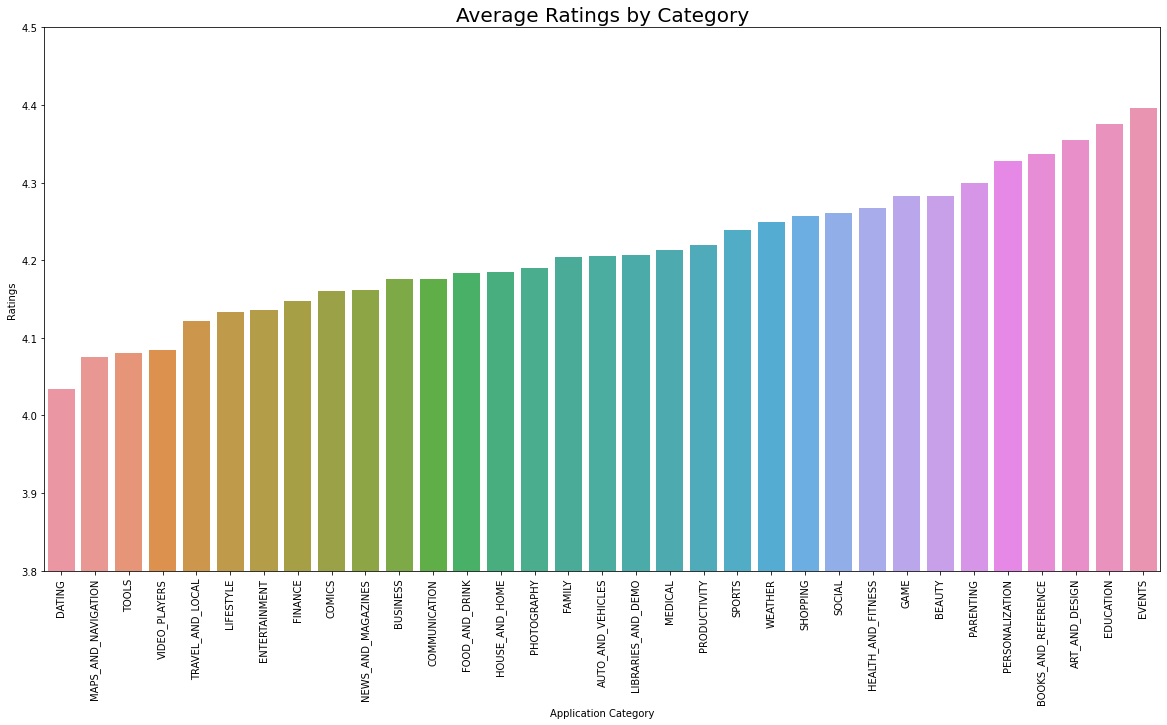

In [276]:
result = data2.groupby(["Category"])['Rating'].aggregate(np.mean).reset_index().sort_values('Rating')

plt.figure(figsize=(20,10))
sns.barplot(x=data2.Category, y=data2.Rating,ci=None,order=result['Category'])

plt.xticks(rotation = 90)
plt.ylim(3.8,4.5)
plt.xlabel('Application Category')
plt.ylabel('Ratings')
plt.title('Average Ratings by Category',size=20)
plt.show()

Events had the highest rating and dating the lowest.

iv) Top 10 highest and lowest rated apps

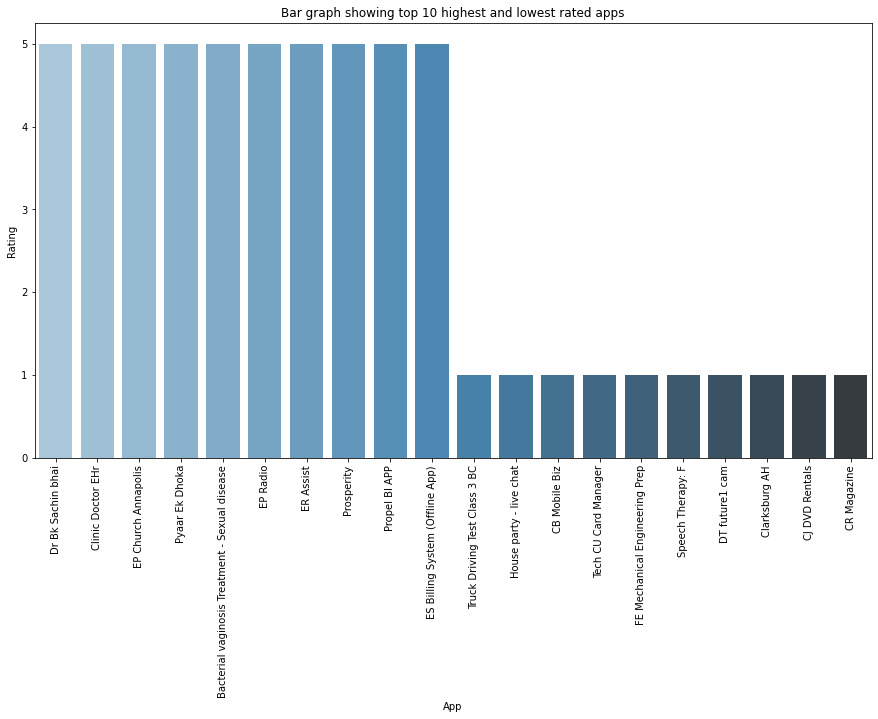

In [277]:
# Group by 'App' and calculate the mean rating for each app
app_ratings = data2.groupby('App')['Rating'].mean().reset_index()

# Sort by rating in descending order to get top 10 highest rated apps
top_10 = app_ratings.sort_values(by='Rating', ascending=False).head(10)

# Sort by rating in ascending order to get top 10 lowest rated apps
bottom_10 = app_ratings.sort_values(by='Rating', ascending=True).head(10)

# Concatenate the top and bottom 10 rated apps
df = pd.concat([top_10, bottom_10])

# Plot the bar graph
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
plt.title('Bar graph showing top 10 highest and lowest rated apps')
sns.barplot(data=df, x='App', y='Rating', palette='Blues_d', orient='v')
plt.show()


The top 3 highest rated apps are Dr Bk Sachin bhai, Clinic Doctor and EP Church Annapolis.
We noted that the highest rated apps whigot 5 while the lowest ranged below 1. 

v) Visualizing the App Size by Type of Install

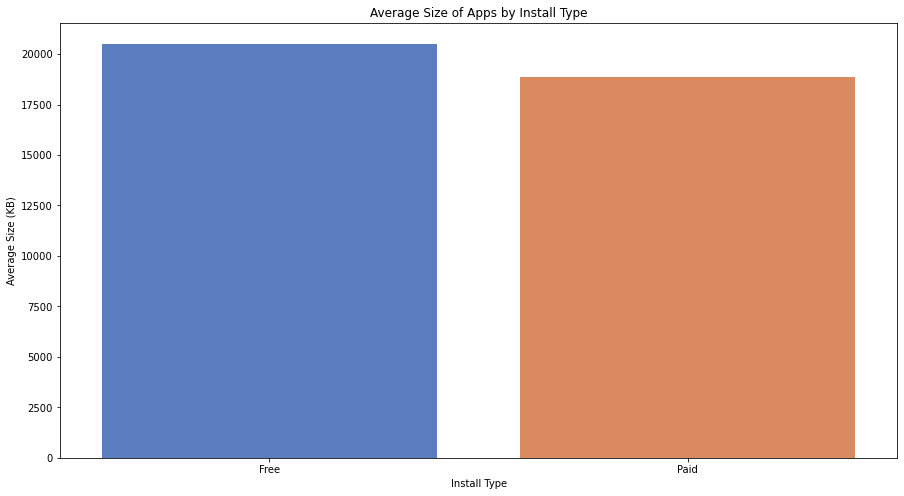

In [278]:
# Bar Plot showing average app size by type of install

avg_size_by_type = data2.groupby('Type')['Size(KB)'].mean().reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(data=avg_size_by_type, x='Type', y='Size(KB)', palette='muted')
plt.xlabel('Install Type')
plt.ylabel('Average Size (KB)')
plt.title('Average Size of Apps by Install Type')
plt.show()

The average size of free apps was higher than the paid ones.

vi) Visualizing Average Rating by Type

Average Rating for Free Apps: 4.1985195996664535
Average Rating for Paid Apps: 4.269150326797396


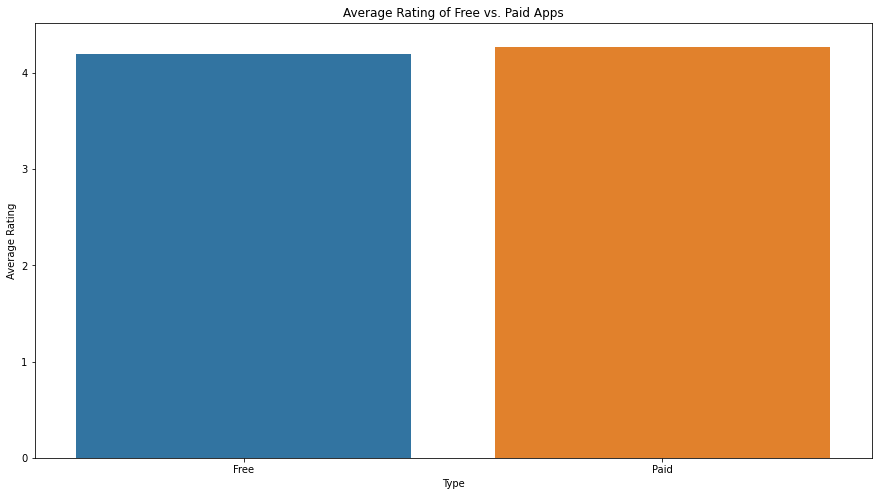

In [279]:
# Calculate average rating by Type
average_rating_by_type = data2.groupby('Type')['Rating'].mean()

# Print the average rating for Free and Paid apps
print("Average Rating for Free Apps:", average_rating_by_type['Free'])
print("Average Rating for Paid Apps:", average_rating_by_type['Paid'])

# visualizing the average rating for the types of installs
plt.figure(figsize=(15, 8))
sns.barplot(data=data2, x='Type', y='Rating', errwidth=0)
plt.title('Average Rating of Free vs. Paid Apps')
plt.xlabel('Type')
plt.ylabel('Average Rating')
plt.show()

We note that paid apps were rated higher.

vii) Visualizing average app size by category

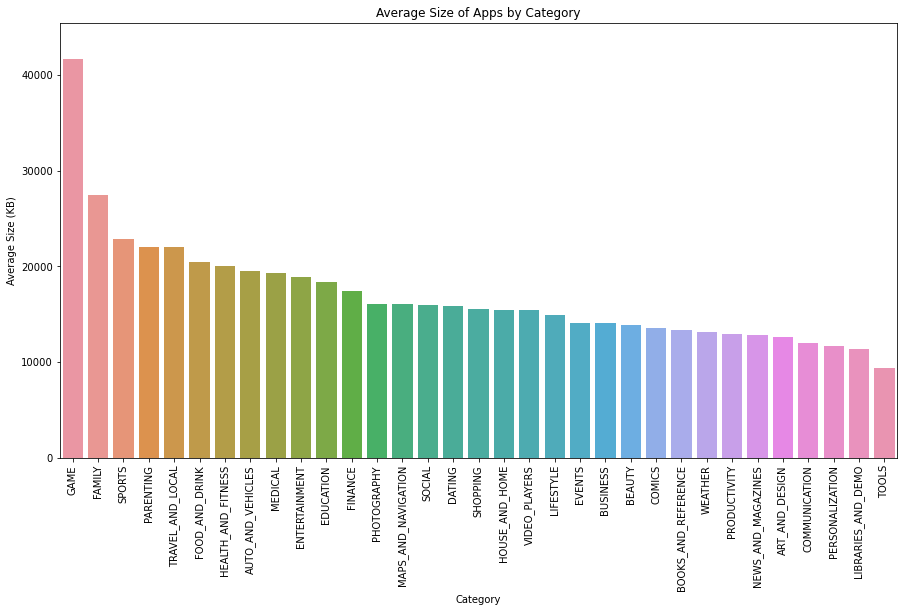

In [280]:
# Visualizing the average size of apps by category

plt.figure(figsize=(15, 8))
sns.barplot(data=data2, x='Category', y='Size(KB)', errwidth=0,
           order=data2.groupby('Category')['Size(KB)'].mean().sort_values(ascending=False).index)
plt.title('Average Size of Apps by Category')
plt.xlabel('Category')
plt.ylabel('Average Size (KB)')
plt.xticks(rotation=90)
plt.show()

Game, Family and Sports categories have higher averages sizes in KB, ranging from 20000 to 40000 KB.

viii) Stacked Bar Chart for Content Rating of App Categories

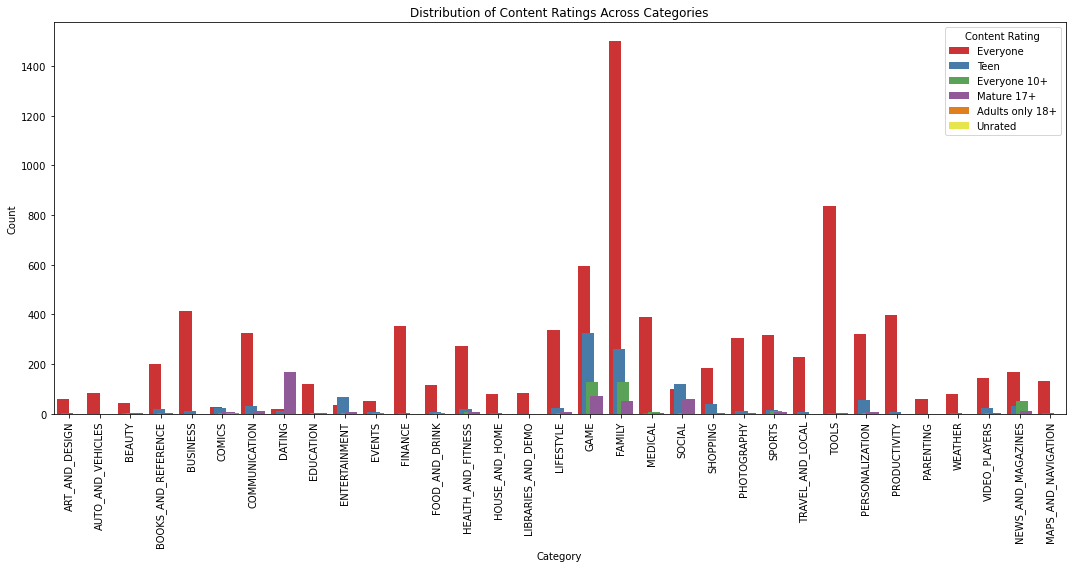

In [281]:
plt.figure(figsize=(15, 8))
sns.countplot(data=data2, x='Category', hue='Content Rating', palette='Set1')
plt.xticks(rotation=90)
plt.title('Distribution of Content Ratings Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Content Rating')

# The line below is for adjusting the width of the bars so that they're not too thin
for patch in plt.gca().patches:
    patch.set_width(0.4)

plt.tight_layout()
plt.show()


The category that had the highest content rating was family,tools and game.

ix) Scatter Plot for Reviews and Price

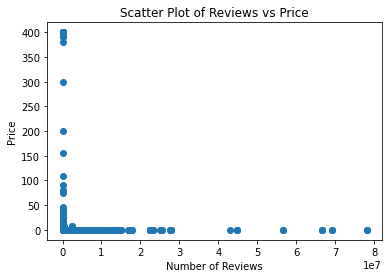

In [282]:
plt.scatter(data2["Reviews"], data2["Price"])
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.title("Scatter Plot of Reviews vs Price")
plt.show()

It is evident that the paid apps had the least number of reviews.

### 3. Multivariate Analysis

#### Plotting the correlation of columns

<AxesSubplot:>

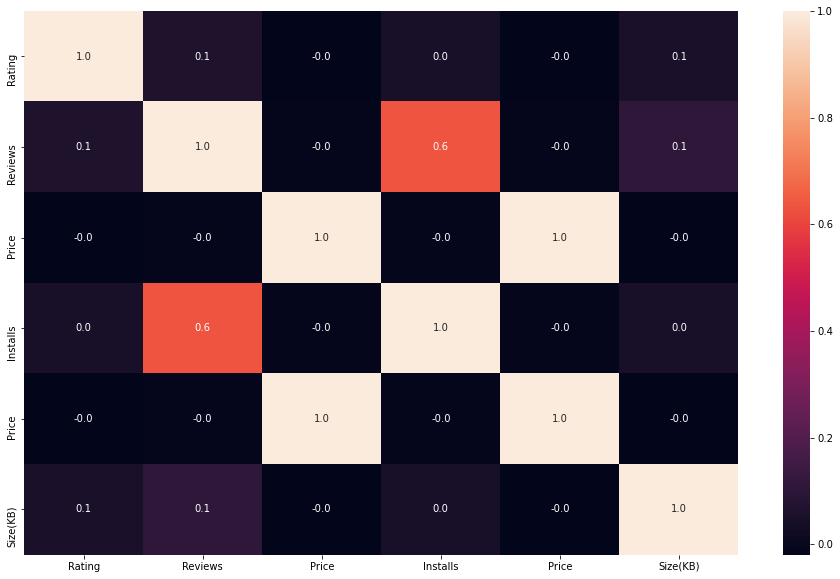

In [283]:
plt.figure(figsize=(16,10))
numeric_cols = ['Rating', 'Reviews',  'Price', 'Installs', 'Price', 'Size(KB)']
sns.heatmap(data2[numeric_cols].corr(),annot=True,fmt = ".1f")

There's a moderately strong positive correlation between Installs and Reviews.And very correlation amongst those other columns

In [284]:
data2.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size(KB)          float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

06/03/2024

To do list:

1)Multivariate analysis -

2)Feature engineering - Binning,dropping columns,feature selection,

3)Cleaning up the notebook

### Feature Engineering 

Checking if our target variable which is Installs, is normally distributed using the Shapiro-Wilk Test

In [285]:
from scipy import stats
shapiro_test_stat, shapiro_p_value = stats.shapiro(data2['Installs'])
print("Shapiro-Wilk Test Statistic:", shapiro_test_stat)
print("Shapiro-Wilk Test p-value:", shapiro_p_value)

# Kurtosis and skewness
kurtosis_val = data2['Installs'].kurtosis()
skewness_val = data2['Installs'].skew()
print("Kurtosis:", kurtosis_val)
print("Skewness:", skewness_val)

Shapiro-Wilk Test Statistic: 0.15366941690444946
Shapiro-Wilk Test p-value: 0.0
Kurtosis: 112.84685232417826
Skewness: 10.126705367146252


c:\Users\VIVIAN\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Since the p-value is less than the significance level (typically 0.05), we reject the null hypothesis of normality. This means that there is sufficient evidence to conclude that the data is not normally distributed.

Additionally, the high values of kurtosis (112.85) and skewness (10.13) indicate that the distribution is highly skewed and has heavy tails compared to a normal distribution. These values further support the conclusion that the data is not normally distributed.

#### 1. Binning the Installs Column

Since the column is not normally distributed, we used quantiles to segment the data into low,medium,high and very high bins.

In [286]:
# Define the quantiles
quantiles = [0, 0.25, 0.5, 0.75, 1]

# Compute the quantiles of the 'InstallsTest' column
install_quantiles = data2['Installs'].quantile(quantiles)

# Define the labels for the quantiles
labels = ['Low', 'Medium', 'High', 'Very High']

# Add a new column indicating the quantile category
data2['InstallCategory'] = pd.cut(data2['Installs'], bins=install_quantiles, labels=labels, include_lowest=True)

# Print the value counts for each category
print(data2['InstallCategory'].value_counts())

Medium       3105
Low          2681
Very High    2566
High         2005
Name: InstallCategory, dtype: int64


In [287]:
data2

,App,Category,Rating,Reviews,Size(KB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,InstallCategory
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Medium
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Very High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,Medium
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,Low
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9728.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,Low
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,12288.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,Low


### 2.Convert Last Updated to number of months since last update

Our goal is to check if the installs are affected by the time since the app was last updated

In [288]:
# Reviewing the dataset
data2

,App,Category,Rating,Reviews,Size(KB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,InstallCategory
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Medium
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Very High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,Medium
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,Low
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9728.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,Low
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,12288.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,Low


In [289]:
data2.dtypes

App                  object
Category             object
Rating              float64
Reviews               int64
Size(KB)            float64
Installs              int64
Type                 object
Price               float64
Content Rating       object
Genres               object
Last Updated         object
Current Ver          object
Android Ver          object
InstallCategory    category
dtype: object

#### Checking the minimum and maximum dates for the last update column

In [290]:
data2['Last Updated'] = pd.to_datetime(data2['Last Updated'])

print(data2['Last Updated'].min(),data2['Last Updated'].max())

2010-05-21 00:00:00 2018-08-08 00:00:00


The earliest year an app was updated was 2010 and the latest is 2018

Creating a new column called 'Year Last Updated' that contains only the year

In [291]:
data2['Year Last Updated'] = data2['Last Updated'].dt.year

Creating a column that has the difference between year last updated and when the data was scraped

In [292]:
data2['Time Since Last Update'] = 2018 - data2['Year Last Updated']
data2.sample(20)

,App,Category,Rating,Reviews,Size(KB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,InstallCategory,Year Last Updated,Time Since Last Update
6204,Blood Glucose Tracker,HEALTH_AND_FITNESS,4.6,9612,3584.0,100000,Free,0.00,Everyone,Health & Fitness,2018-05-18,1.8.12,4.4 and up,Medium,2018,0
3357,Evie Launcher,PERSONALIZATION,4.7,139258,12288.0,5000000,Free,0.00,Everyone,Personalization,2018-08-03,Varies with device,4.4 and up,Very High,2018,0
7172,CD Music,LIBRARIES_AND_DEMO,4.3,1,2355.2,100,Free,0.00,Everyone,Libraries & Demo,2018-03-30,1.0,4.4 and up,Low,2018,0
7387,CI Time,PRODUCTIVITY,4.3,4,2560.0,100,Free,0.00,Everyone,Productivity,2017-03-17,1.2.392,4.0 and up,Low,2017,1
9060,Dress Up RagazzA13 DX,FAMILY,3.5,13,43008.0,100,Paid,0.99,Everyone,Simulation,2016-09-16,1.0.5,4.0.3 and up,Low,2016,2
6669,Bible Quizzer - The App for Bible Quizzers,FAMILY,4.3,0,33792.0,100,Free,0.00,Everyone,Education,2018-08-02,30.0,4.2 and up,Low,2018,0
6074,Be you GO Launcher Theme,PERSONALIZATION,4.3,1580,3686.4,100000,Free,0.00,Everyone,Personalization,2014-11-12,v1.0,2.3 and up,Medium,2014,4
2294,Number Therapy,MEDICAL,4.3,0,5427.2,50,Paid,14.99,Everyone,Medical,2017-10-03,1.0,4.0.3 and up,Low,2017,1
9707,Tester EP,TOOLS,4.3,9,4915.2,100,Free,0.00,Everyone,Tools,2018-05-15,3.0,2.1 and up,Low,2018,0
3990,Learn C [NEW],FAMILY,4.5,349,11264.0,50000,Free,0.00,Everyone,Education,2018-03-16,2.1.1,4.0 and up,Medium,2018,0


Grouping Installs by Time Since Last Updated

In [293]:
grouped_by_year = data2.groupby('Time Since Last Update')['Installs'].mean().astype(int)

In [294]:
grouped_by_year

Time Since Last Update
0    20271903
1     2112930
2     1757244
3      919472
4     1322721
5      954503
6      538161
7     1160473
8      100000
Name: Installs, dtype: int32

<AxesSubplot:xlabel='Time Since Last Update', ylabel='Installs'>

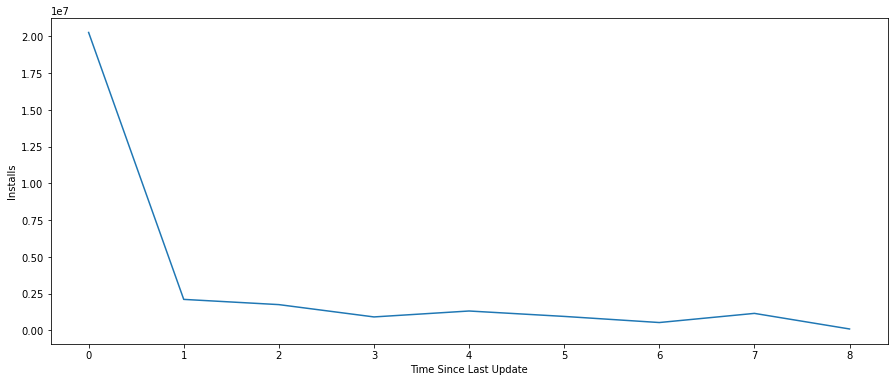

In [295]:
plt.figure(figsize=(15,6))
# plt.ylim(0,2500000)

# Line Plot
sns.lineplot(data=grouped_by_year)

In [296]:
correlation = data2['Time Since Last Update'].corr(data2['Installs'])
print("Correlation between Years Since Last Update and Installs:", correlation)

Correlation between Years Since Last Update and Installs: -0.08738017827153567


Based on the graph and the correlation above, we observed that there is little correlation between Time Since Last Update and the Installs column.So we decided to drop the last updated column

### Current Version  column

#### Splitting values in Current Version to see effects on Installs column

In [297]:
data2.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size(KB)', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'InstallCategory', 'Year Last Updated',
       'Time Since Last Update'],
      dtype='object')

Checking how many rows in current version indicate Varies with device

In [298]:
data2[data2['Current Ver'] == 'Varies with device'].shape

(1302, 16)

The code below is a for loop to extract the rows that don't have current version == varies with device

In [299]:
version_list = []
for value in data2['Current Ver'].astype(str):
    if value == 'Varies with device':
        version_list.append('Varies with device')
    else:
        version_list.append(value.split('.')[0])

data2['Version'] = version_list

In [300]:
data2.sample(20)

,App,Category,Rating,Reviews,Size(KB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,InstallCategory,Year Last Updated,Time Since Last Update,Version
1996,Swamp Attack,GAME,4.4,2119235,71680.0,50000000,Free,0.00,Everyone 10+,Action,2018-06-29,3.0.1,4.1 and up,Very High,2018,0,3
2450,Tablet Reminder,MEDICAL,5.0,4,2560.0,5,Free,0.00,Everyone,Medical,2018-08-03,1.0,4.1 and up,Low,2018,0,1
10444,Signal Spy - Monitor Signal Strength & Data Usage,TOOLS,4.4,875,8704.0,100000,Free,0.00,Everyone,Tools,2017-12-31,1.9.9.5,5.1 and up,Medium,2017,1,1
5548,SNOW - AR Camera,PHOTOGRAPHY,4.3,1017237,12288.0,50000000,Free,0.00,Everyone,Photography,2018-07-30,7.6.5,4.3 and up,Very High,2018,0,7
8174,"Face Filter, Selfie Editor - Sweet Camera",PHOTOGRAPHY,4.7,142758,22528.0,10000000,Free,0.00,Everyone,Photography,2018-07-06,1.5.1,4.4 and up,Very High,2018,0,1
7742,ClanManagerTT2,FAMILY,4.7,55,3379.2,1000,Free,0.00,Everyone,Casual,2018-07-24,2.2.9,4.4 and up,Low,2018,0,2
5229,AJ+ Beta,NEWS_AND_MAGAZINES,4.3,0,12288.0,1000,Free,0.00,Everyone,News & Magazines,2017-05-04,Varies with device,Varies with device,Low,2017,1,Varies with device
4287,K PLUS,FINANCE,4.4,124324,12288.0,10000000,Free,0.00,Everyone,Finance,2018-06-26,4.6.0,4.2 and up,Very High,2018,0,4
7215,Depths of Betrayal CE (Full),FAMILY,4.3,363,14336.0,1000,Paid,2.99,Everyone 10+,Casual,2013-08-19,1.0.0,2.3 and up,Low,2013,5,1
9012,Rose Gold DW Watch Theme,PERSONALIZATION,4.3,1,3379.2,100,Free,0.00,Everyone,Personalization,2018-07-25,1.1.1,4.0 and up,Low,2018,0,1


In [301]:
# version_correlation = data2['Version'].corr(data2['Installs'])
# print("Correlation between Years Since Last Update and Installs:", version_correlation)

In [302]:
# Grouping Major Version by installs
grouped_version = data2.groupby('Version')['Installs'].mean().astype(int)
grouped_version

Version
0             3140768
01            1000000
01e               300
02            1000000
04             750000
               ...   
v67_slk3       100000
v7           10000000
v8           10000000
v8[1            10000
version 0        1000
Name: Installs, Length: 209, dtype: int32

<AxesSubplot:xlabel='Version', ylabel='Installs'>

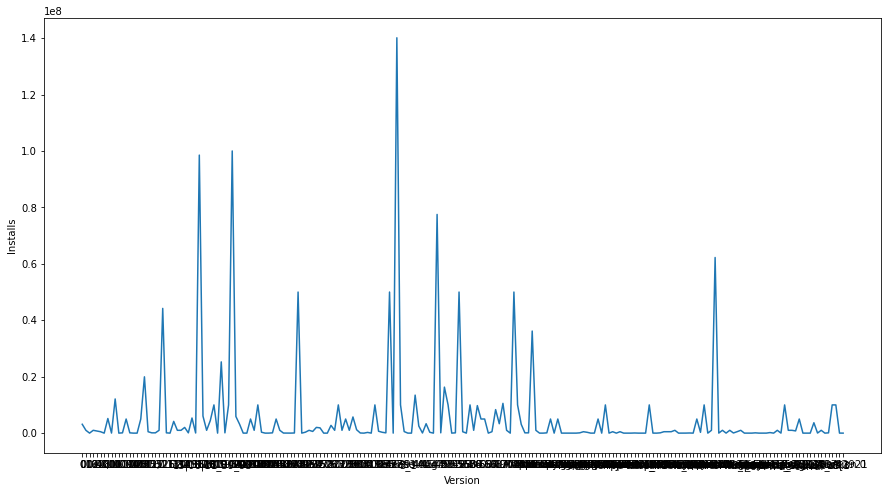

In [303]:
# Line graph for Major version and installs

plt.figure(figsize=(15,8))

sns.lineplot(data=grouped_version)

The graph is very erratic hence no correlation because is each version is unique to the app

In [304]:
data2.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size(KB)', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'InstallCategory', 'Year Last Updated',
       'Time Since Last Update', 'Version'],
      dtype='object')

We decided to drop the following columns:

In [305]:
# Dropping the columns

data2.drop(columns=['Last Updated','Current Ver','Genres','Installs','Android Ver','Year Last Updated','Time Since Last Update','Version'],inplace=True)

In [306]:
# Setting the app as the index

data2.set_index('App',inplace=True)

In [307]:
data2

,Category,Rating,Reviews,Size(KB),Type,Price,Content Rating,InstallCategory
App,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,Free,0.0,Everyone,Medium
Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,Free,0.0,Everyone,High
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8908.8,Free,0.0,Everyone,Very High
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,Free,0.0,Teen,Very High
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,Free,0.0,Everyone,Medium
...,...,...,...,...,...,...,...,...
Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,Free,0.0,Everyone,Medium
Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,Free,0.0,Everyone,Low
Parkinson Exercices FR,MEDICAL,4.3,3,9728.0,Free,0.0,Everyone,Low


### Checking how distributed the classes are in the target variable

In [308]:
print('Raw counts: \n')
print(data2['InstallCategory'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(data2['InstallCategory'].value_counts(normalize=True))

Raw counts: 

Medium       3105
Low          2681
Very High    2566
High         2005
Name: InstallCategory, dtype: int64
-----------------------------------
Normalized counts: 

Medium       0.299797
Low          0.258859
Very High    0.247755
High         0.193589
Name: InstallCategory, dtype: float64


The classes are almost uniformly balanced

### One-Hot Encoding

i) Splitting the dataset into train and test sets

In [309]:
from sklearn.model_selection import train_test_split

# Assigning the features and the target
X = data2.drop(['InstallCategory'],axis=1)
y = data2['InstallCategory']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=999,test_size=0.2)

In [310]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8285, 7)
(2072, 7)
(8285,)
(2072,)


To do list for tomorrow:

> Add more multivariate analysis

>Convert last update column to number of months since last update

>Split the values in current version and android version to check if the versions affect the number of installs and if it has an effect then it belongs to EDA

>One Hot Encoding

>Label Encoding

Scaling

Dimensionality reduction

Incorporate a baseline model and one more model

### One Hot Encoding

We're one hot encoding the Category column then label encode the Type and Content Rating column.
This is because if we one hot encoded all the categorical columns, we would end up with so many features.Since content rating and the type column have few classes compared to category, label encoding presented itself as the best option.
Label encoding the category column was avoided because it would have introduced bias into the model due to the high number of classes. 

In [311]:
categorical_column = ['Category']

# One Hot Encoding X_train
X_train_encoded = pd.get_dummies(data=X_train,columns=categorical_column)

# One Hot Encoding X_test
X_test_encoded = pd.get_dummies(data=X_test,columns=categorical_column)

X_train_encoded.sample(20)


,Rating,Reviews,Size(KB),Type,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
App,,,,,,,,,,,,,,,,,,,,,
E-NUM,4.0,10374,12288.0,Free,0.00,Everyone,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gboard - the Google Keyboard,4.2,1859109,12288.0,Free,0.00,Everyone,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Shabad Gurubani Punjabi mp3 free - Ek Onkar Satnam,5.0,5,65536.0,Free,0.00,Everyone,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Microsoft Remote Desktop,4.2,97702,12288.0,Free,0.00,Everyone,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BIG Launcher,4.3,881,6041.6,Paid,9.99,Everyone,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Tropical Beach Live Wallpaper,4.0,11343,8601.6,Free,0.00,Everyone,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
DG - Digital Coupons - Free Coupon and Discount,3.6,38,1126.4,Free,0.00,Everyone,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Larry H Miller Automotive,3.1,67,8499.2,Free,0.00,Everyone,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
DT CLOTHINGS,5.0,1,8089.6,Free,0.00,Everyone,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Label Encoding the Type Column

In [312]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train_encoded['Type'] = le.fit_transform(X_train_encoded['Type'])
X_test_encoded['Type'] = le.transform(X_test_encoded['Type'])

In [313]:
X_test_encoded

,Rating,Reviews,Size(KB),Type,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
App,,,,,,,,,,,,,,,,,,,,,
GPS Map Free,4.0,33782,7782.4,0,0.00,Everyone,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
EF Financial Control Free,4.4,58,3788.8,0,0.00,Everyone,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OkCupid Dating,4.1,285838,15360.0,0,0.00,Mature 17+,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Truecaller: Caller ID, SMS spam blocking & Dialer",4.5,7820209,12288.0,0,0.00,Everyone,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BN Pro Play HD Text,4.4,63,417.0,0,0.00,Everyone,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Snap Cat Face Camera,4.0,5855,5017.6,0,0.00,Everyone,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Flipp - Weekly Shopping,4.6,85782,12288.0,0,0.00,Everyone,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
RollerCoaster Tycoon® Classic,4.6,10795,70656.0,1,5.99,Everyone,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Label Encoding Content Rating Column

In [314]:
# X_train
X_train_encoded['Content Rating'] = le.fit_transform(X_train_encoded['Content Rating'])

# X_test
X_test_encoded['Content Rating'] = le.transform(X_test_encoded['Content Rating'])

In [315]:
X_train_encoded.sample(20)

,Rating,Reviews,Size(KB),Type,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
App,,,,,,,,,,,,,,,,,,,,,
Shoot M-16 vs AK-47 : realistic weapon simulator,3.0,2,33792.0,0,0.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TNEB Bill Checker / TNEB Bill Status,2.5,2,5120.0,0,0.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bubble Shooter DX,4.2,636,4096.0,0,0.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EG Mantenimiento,4.3,1,25600.0,0,0.00,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IKO,4.7,167168,20480.0,0,0.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Talking Pictures: Autism, CP",3.9,22,801.0,0,0.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Autool BT-BOX,3.5,4,17408.0,0,0.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Sight Words Pre-K to Grade-3,4.4,1185,40960.0,0,0.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Speed Cameras Radar,4.4,18710,4096.0,0,0.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We are scaling the 'Size' and 'Reviews' columns because these two columns have a wide range of values. This will improve the performance of our models by reducing the bias and ensuring no single feature dominates the calculation of distances in distance-based algorithms

## Scaling 

### Scaling the Reviews Column

In [316]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# X_train
X_train_encoded['Reviews'] = scaler.fit_transform(X_train_encoded['Reviews'].values.reshape(-1,1))

# X_test
X_test_encoded['Reviews'] = scaler.transform(X_test_encoded['Reviews'].values.reshape(-1,1))

In [317]:
X_train_encoded

,Rating,Reviews,Size(KB),Type,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
App,,,,,,,,,,,,,,,,,,,,,
Citizens Bank - CB Mobile,4.8,-0.146242,11264.0,0,0.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GMAT Math Flashcards,4.4,-0.145602,12288.0,0,0.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CM Locker - Security Lockscreen,4.6,0.975804,12288.0,0,0.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Dr. Parker : Parking Simulator,4.5,-0.141070,82944.0,0,0.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bubble Witch 3 Saga,4.7,0.482641,79872.0,0,0.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dirt Trackin Sprint Cars,3.8,-0.146063,48128.0,1,3.99,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Theme For Techno Camon CX,4.7,-0.146229,10240.0,0,0.00,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
DU Cleaner – Memory cleaner & clean phone cache,4.5,0.022872,9113.6,0,0.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Scaling the Size Column

In [318]:
# X_train
X_train_encoded['Size(KB)'] = scaler.fit_transform(X_train_encoded['Size(KB)'].values.reshape(-1,1))

# X_test
X_test_encoded['Size(KB)'] = scaler.transform(X_test_encoded['Size(KB)'].values.reshape(-1,1))

In [319]:
X_test_encoded

,Rating,Reviews,Size(KB),Type,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
App,,,,,,,,,,,,,,,,,,,,,
GPS Map Free,4.0,-0.133980,-0.585503,0,0.00,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
EF Financial Control Free,4.4,-0.146223,-0.769872,0,0.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OkCupid Dating,4.1,-0.042473,-0.235675,0,0.00,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Truecaller: Caller ID, SMS spam blocking & Dialer",4.5,2.692823,-0.377498,0,0.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BN Pro Play HD Text,4.4,-0.146221,-0.925535,0,0.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Snap Cat Face Camera,4.0,-0.144118,-0.713143,0,0.00,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Flipp - Weekly Shopping,4.6,-0.115102,-0.377498,0,0.00,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
RollerCoaster Tycoon® Classic,4.6,-0.142325,2.317125,1,5.99,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [320]:
X_train_encoded.shape

(8285, 39)

## Modelling

In [321]:
# Function for feature importance

def model_feature_importance(classifier_name,trained_df,model_name):
    feature_importance = classifier_name.feature_importances_[:10]
    feature_names = list(trained_df.columns)

    # Sorting according to feature importance using numpy
    indices = np.argsort(feature_importance)

    # Plotting
    plt.figure(figsize=(10,8))
    plt.barh(range(len(indices)),feature_importance[indices],color='Teal')
    plt.title(f"Feature Importance according to {model_name}")
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')

    return plt.show()

i) Logistic Regression

In [322]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

logreg = LogisticRegression(random_state=42)

# Fit the model on the training set
logreg.fit(X_train_encoded,y_train)

# Predicting 
y_pred = logreg.predict(X_test_encoded)

# Model performance evaluation
print("Accuracy Score", accuracy_score(y_test,y_pred))


Accuracy Score 0.5284749034749034


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

logreg = LogisticRegression(random_state=42)

# Fit the model on the training set
logreg.fit(X_train_encoded, y_train)

# Predicting 
y_pred = logreg.predict(X_test_encoded)

# Model performance evaluation
# matrix = confusion_matrix(y_test, y_pred)
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n        High       0.37      0.22      0.28       403\n         Low       0.46      0.52      0.49       529\n      Medium       0.45      0.55      0.49       642\n   Very High       0.84      0.76      0.80       498\n\n    accuracy                           0.53      2072\n   macro avg       0.53      0.51      0.51      2072\nweighted avg       0.53      0.53      0.52      2072\n'

The classification report is mixing up precision and recall
**To be revisited

In [ ]:
# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred)
conf_matrix_logreg = confusion_matrix(y_test, y_pred)
classification_rep_logreg = classification_report(y_test, y_pred)

print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_logreg}")
print(f"Classification Report:\n{classification_rep_logreg}")

Logistic Regression Accuracy: 0.53
Confusion Matrix:
[[ 90  84 185  44]
 [ 46 275 193  15]
 [ 75 204 352  11]
 [ 30  32  60 376]]
Classification Report:
              precision    recall  f1-score   support

        High       0.37      0.22      0.28       403
         Low       0.46      0.52      0.49       529
      Medium       0.45      0.55      0.49       642
   Very High       0.84      0.76      0.80       498

    accuracy                           0.53      2072
   macro avg       0.53      0.51      0.51      2072
weighted avg       0.53      0.53      0.52      2072



In [ ]:
# conf_matrix = [[90, 84, 184, 45],
#                [44, 278, 192, 15],
#                [77, 203, 352, 10],
#                [31, 32, 60, 375]]

# for i, row in enumerate(conf_matrix):
#     TP = row[i]
#     FP = sum(row) - TP
#     FN = sum(conf_matrix[j][i] for j in range(len(conf_matrix))) - TP
#     TN = sum(sum(conf_matrix[j][k] for k in range(len(conf_matrix)) if k != i) for j in range(len(conf_matrix)) if j != i)
#     print(f"Class {i}:")
#     print(f"True Positives: {TP}")
#     print(f"True Negatives: {TN}")
#     print(f"False Positives: {FP}")
#     print(f"False Negatives: {FN}")
#     print()


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Creating a function to plot the confusion matrices for all the models to avoid repetition

def plot_confusion_matrix(y_test_values,y_prediction_values,cmap_value):
    labels = sorted(set(y_test_values).union(set(y_prediction_values)))

    # Plotting the confusion matrix
    cm = confusion_matrix(y_test_values,y_prediction_values)

    # Visualizing the confusion matrix
    display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
    return display.plot(cmap=plt.cm.get_cmap(cmap_value))

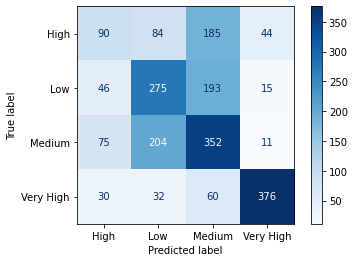

In [ ]:
plot_confusion_matrix(y_test,y_pred,'Blues')

ii) Decision Trees

- Come up with a function that performs the modelling and prints out the classification report
- Models:
    - Random Forest
    - KNN
    - Adaboost
    - XGBoost
    - SVM

### Function for modelling

#### Importing the libraries we need for modelling

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
#from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import random
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
'''
def model_function(classifier_name):
    classifiers = {
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Ada Boost': AdaBoostClassifier(),
        'XGBoost': XGBClassifier(),
        'KNN': KNeighborsClassifier(),
        'SVC': SVC()
    }

    # Setting a random state
    random.seed(42)
    
    # Instantiation
    clf = classifiers[classifier_name]

    # Fitting the model on training set
    clf.fit(X_train_encoded,y_train)

    # Predicting 
    y_pred = clf.predict(X_test_encoded)

    # Accuracy Score
    accuracy = accuracy_score(y_test,y_pred)

    # Classification Report
    report = classification_report(y_test,y_pred)

    print("Accuracy Score: ",accuracy)

    print('\n')

    print("Classification Report: \n",report)

'''

In [323]:
def train_and_evaluate_model(model_name):

    if model_name == "KNN":
        model = KNeighborsClassifier(n_neighbors=5)
    elif model_name == "Logistic Regression":
        model = LogisticRegression()
    elif model_name == "Decision Tree":
        model = DecisionTreeClassifier(random_state = 42)
    elif model_name == "SVM":
        model = SVC(kernel="linear", C=1)
    elif model_name == "AdaBoost":
        model = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
    elif model_name == "XGBoost":
        model = XGBClassifier()
    elif model_name == "Random Forest":
        model = RandomForestClassifier(random_state=42)
    else:
        raise ValueError(f"Invalid model name: {model_name}")

    # Cross-validation with accuracy scoring
    cv_scores = cross_val_score(model, X_train_encoded, y_train, cv=5, scoring="accuracy")
    print(f"{model_name} Cross-Validation Scores: {cv_scores}")

    model.fit(X_train_encoded, y_train)
    predictions = model.predict(X_test_encoded)
    accuracy = accuracy_score(y_test, predictions)

    # Classification report
    report = classification_report(y_test, predictions)

    print("Accuracy Score: ",accuracy)

    print('\n')

    print("Classification Report: \n",report)



In [218]:
train_and_evaluate_model('Logistic Regression')

NameError: name 'X_train_encoded' is not defined

In [129]:
train_and_evaluate_model('Decision Tree')

Decision Tree Cross-Validation Scores: [0.82800241 0.82196741 0.8092939  0.82257091 0.81955341]
Accuracy Score:  0.8223938223938224


Classification Report: 
               precision    recall  f1-score   support

        High       0.69      0.70      0.70       403
         Low       0.88      0.90      0.89       529
      Medium       0.83      0.79      0.81       642
   Very High       0.86      0.88      0.87       498

    accuracy                           0.82      2072
   macro avg       0.81      0.82      0.82      2072
weighted avg       0.82      0.82      0.82      2072



In [116]:
train_and_evaluate_model('KNN')

KNN Cross-Validation Scores: [0.53832227 0.53832227 0.53409777 0.54013277 0.53832227]
Accuracy Score:  0.5183397683397684


Classification Report: 
               precision    recall  f1-score   support

        High       0.32      0.39      0.35       403
         Low       0.57      0.65      0.61       529
      Medium       0.48      0.43      0.46       642
   Very High       0.73      0.58      0.65       498

    accuracy                           0.52      2072
   macro avg       0.53      0.52      0.52      2072
weighted avg       0.53      0.52      0.52      2072



In [118]:
train_and_evaluate_model('SVM')

SVM Cross-Validation Scores: [0.53590827 0.50211225 0.50754375 0.50331925 0.51840676]
Accuracy Score:  0.5188223938223938


Classification Report: 
               precision    recall  f1-score   support

        High       0.37      0.28      0.32       403
         Low       0.43      0.44      0.43       529
      Medium       0.43      0.59      0.50       642
   Very High       0.99      0.70      0.82       498

    accuracy                           0.52      2072
   macro avg       0.56      0.50      0.52      2072
weighted avg       0.55      0.52      0.53      2072



In [120]:
train_and_evaluate_model('AdaBoost')

AdaBoost Cross-Validation Scores: [0.64091732 0.63910682 0.63971032 0.5908268  0.72963186]
Accuracy Score:  0.6447876447876448


Classification Report: 
               precision    recall  f1-score   support

        High       0.39      0.94      0.55       403
         Low       0.84      0.98      0.90       529
      Medium       0.92      0.69      0.79       642
   Very High       0.00      0.00      0.00       498

    accuracy                           0.64      2072
   macro avg       0.54      0.65      0.56      2072
weighted avg       0.58      0.64      0.58      2072



In [133]:
train_and_evaluate_model('Random Forest')

Random Forest Cross-Validation Scores: [0.86964393 0.85878093 0.85938443 0.86360893 0.84852142]
Accuracy Score:  0.8692084942084942


Classification Report: 
               precision    recall  f1-score   support

        High       0.79      0.77      0.78       403
         Low       0.91      0.91      0.91       529
      Medium       0.85      0.87      0.86       642
   Very High       0.92      0.90      0.91       498

    accuracy                           0.87      2072
   macro avg       0.87      0.86      0.87      2072
weighted avg       0.87      0.87      0.87      2072



##### TO DO LIST
- Incorporate Confusion Matrix into function model
- Hyperparameter tuning
- Call feature importance function for each model



Checking for outliers in the Reviews column

<AxesSubplot:>

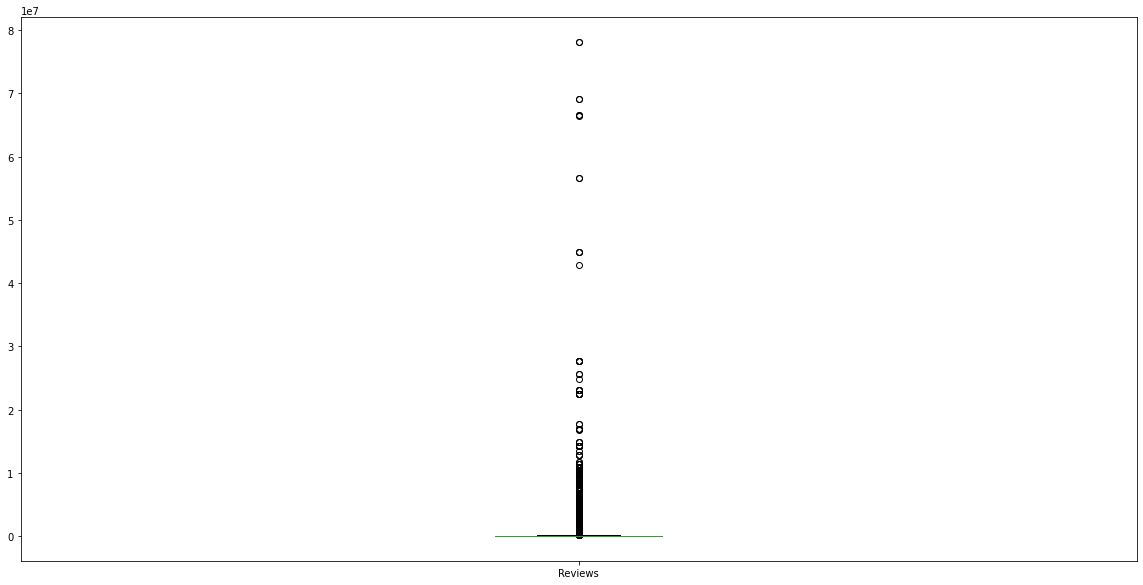

In [ ]:
data2['Reviews'].plot(kind='box',figsize=(20,10))

In [138]:
data2['Reviews'] = np.log(data2['Reviews'])

c:\Users\VIVIAN\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [139]:
data2

,App,Category,Rating,Reviews,Size(KB),Installs,Type,Price,Content Rating,Genres,Last Updated,bin_category,InstallCategory
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19456.0,9,Free,0.0,Everyone,Art & Design,"January 7, 2018",Low,Medium
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14336.0,12,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",Low,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8908.8,14,Free,0.0,Everyone,Art & Design,"August 1, 2018",Low,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25600.0,16,Free,0.0,Teen,Art & Design,"June 8, 2018",Low,Very High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2867.2,11,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",Low,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,3.637586,54272.0,8,Free,0.0,Everyone,Education,"July 25, 2017",Low,Medium
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1.386294,3686.4,5,Free,0.0,Everyone,Education,"July 6, 2018",Low,Low
10838,Parkinson Exercices FR,MEDICAL,4.3,1.098612,9728.0,7,Free,0.0,Everyone,Medical,"January 20, 2017",Low,Low
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,4.736198,12288.0,7,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Low,Low


<AxesSubplot:>

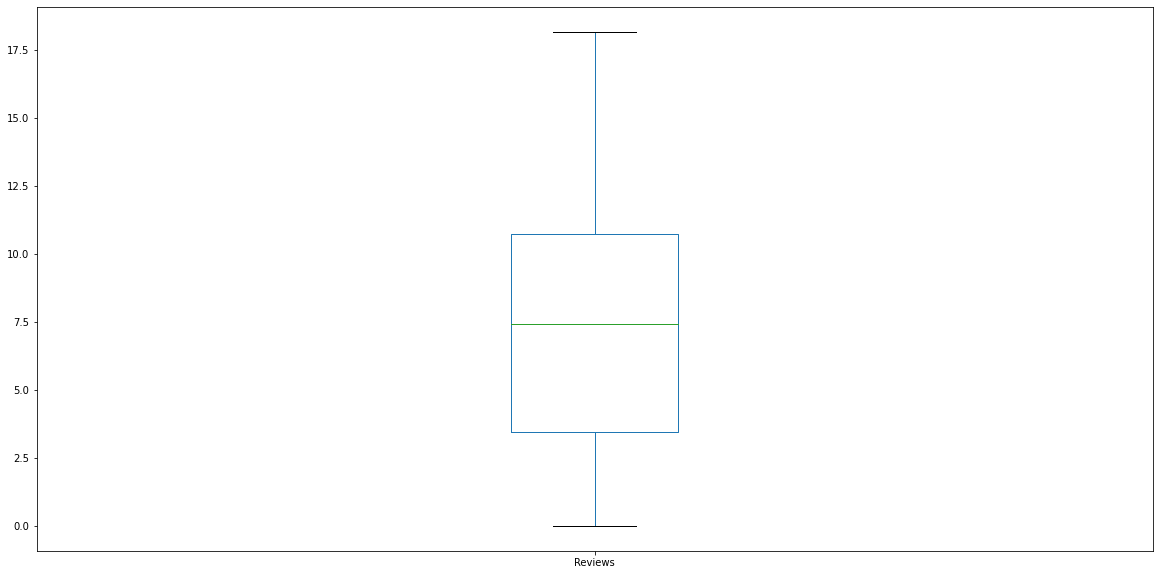

In [140]:
data2['Reviews'].plot(kind='box',figsize=(20,10))

Binning

In [ ]:
# Define bin edges
bins = [0, 333333333, 666666666, 1000000000]

# Assign labels to bins
labels = ['Low', 'Medium', 'High']

# Create a new column with bin labels
data2["bin_category"] = pd.cut(data2["Installs"], bins=bins, labels=labels)

data2.sample(20)